In [1]:
## Neural Network Models for Combined Classification and Regression

# Import library
import requests, zipfile, shutil, os
requests.packages.urllib3.disable_warnings()
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Define the URL to download the dataset #https://www.muratkoklu.com/datasets/
dataset_url = "https://www.muratkoklu.com/datasets/vtdhnd10.php"

# Download the dataset to a temporary file
response = requests.get(dataset_url)
with open("Grapevine_Leaves_Image_Dataset.zip", "wb") as f:
    f.write(response.content)

# Extract the dataset from the ZIP file
with zipfile.ZipFile("Grapevine_Leaves_Image_Dataset.zip", "r") as zip_ref:
    zip_ref.extractall()

# Delete the temporary ZIP file
os.remove("Grapevine_Leaves_Image_Dataset.zip")

# Define the source directories for the downloaded images
dimnit_dir = "./Grapevine_Leaves_Image_Dataset/Dimnit/"
nazli_dir = "./Grapevine_Leaves_Image_Dataset/Nazli/"

# Define the directories for train, test, and validation sets for both categories
train_dir_dimnit = "./Grapevine_Leaves_Image_Dataset/train/dimnit"
test_dir_dimnit = "./Grapevine_Leaves_Image_Dataset/test/dimnit"
validation_dir_dimnit = "./Grapevine_Leaves_Image_Dataset/validation/dimnit"

train_dir_nazli = "./Grapevine_Leaves_Image_Dataset/train/nazli"
test_dir_nazli = "./Grapevine_Leaves_Image_Dataset/test/nazli"
validation_dir_nazli = "./Grapevine_Leaves_Image_Dataset/validation/nazli"

# Create directories for train, test, and validation sets for both categories
for directory in [train_dir_dimnit, test_dir_dimnit, validation_dir_dimnit,
                  train_dir_nazli, test_dir_nazli, validation_dir_nazli]:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Define the number of images to copy for each set
train_images = 70
test_images = 20
validation_images = 10

# Copy Dimnit images
dimnit_image_files = os.listdir(dimnit_dir)
np.random.shuffle(dimnit_image_files)

# Train set
for i in range(train_images):
    source_path = os.path.join(dimnit_dir, dimnit_image_files[i])
    destination_path = os.path.join("./Grapevine_Leaves_Image_Dataset/train/dimnit/", dimnit_image_files[i])
    shutil.copy2(source_path, destination_path)

# Test set
for i in range(train_images, train_images + test_images):
    source_path = os.path.join(dimnit_dir, dimnit_image_files[i])
    destination_path = os.path.join("./Grapevine_Leaves_Image_Dataset/test/dimnit/", dimnit_image_files[i])
    shutil.copy2(source_path, destination_path)

# Validation set
for i in range(train_images + test_images, train_images + test_images + validation_images):
    source_path = os.path.join(dimnit_dir, dimnit_image_files[i])
    destination_path = os.path.join("./Grapevine_Leaves_Image_Dataset/validation/dimnit/", dimnit_image_files[i])
    shutil.copy2(source_path, destination_path)

# Copy Nazli images
nazli_image_files = os.listdir(nazli_dir)
np.random.shuffle(nazli_image_files)

# Train set
for i in range(train_images):
    source_path = os.path.join(nazli_dir, nazli_image_files[i])
    destination_path = os.path.join("./Grapevine_Leaves_Image_Dataset/train/nazli/", nazli_image_files[i])
    shutil.copy2(source_path, destination_path)

# Test set
for i in range(train_images, train_images + test_images):
    source_path = os.path.join(nazli_dir, nazli_image_files[i])
    destination_path = os.path.join("./Grapevine_Leaves_Image_Dataset/test/nazli/", nazli_image_files[i])
    shutil.copy2(source_path, destination_path)

# Validation set
for i in range(train_images + test_images, train_images + test_images + validation_images):
    source_path = os.path.join(nazli_dir, nazli_image_files[i])
    destination_path = os.path.join("./Grapevine_Leaves_Image_Dataset/validation/nazli/", nazli_image_files[i])
    shutil.copy2(source_path, destination_path)

In [3]:
# Define the path to the downloaded dataset
train_dir = "./Grapevine_Leaves_Image_Dataset/train/"
test_dir = "./Grapevine_Leaves_Image_Dataset/test/"
validation_dir = "./Grapevine_Leaves_Image_Dataset/validation/"

# Image data preprocessing
images = []
labels = []

# Iterate over the Dimnit images and add them to the arrays
for filename in os.listdir(dimnit_dir):
    image = Image.open(os.path.join(dimnit_dir, filename))
    image = image.resize((128, 128))  # Resize the image to 128x128
    image = np.array(image) / 255.0  # Normalize pixel values to range [0, 1]
    images.append(image)
    labels.append(0)  # Label Dimnit as 0

# Iterate over the Nazli images and add them to the arrays
for filename in os.listdir(nazli_dir):
    image = Image.open(os.path.join(nazli_dir, filename))
    image = image.resize((128, 128))  # Resize the image to 128x128
    image = np.array(image) / 255.0  # Normalize pixel values to range [0, 1]
    images.append(image)
    labels.append(1)  # Label Nazli as 1

In [4]:
# Initialize empty NumPy arrays to store the image data and labels
images = []
labels = []

# Iterate over the Dimnit images and add them to the arrays
for filename in os.listdir(train_dir_dimnit):
    image = Image.open(os.path.join(train_dir_dimnit, filename))
    images.append(np.array(image))
    labels.append(0)  # Label Dimnit as 0

# Iterate over the Nazli images and add them to the arrays
for filename in os.listdir(train_dir_nazli):
    image = Image.open(os.path.join(train_dir_nazli, filename))
    images.append(np.array(image))
    labels.append(1)  # Label Nazli as 1

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Print the shapes of the image and labels arrays
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)

Images shape: (140, 511, 511, 4)
Labels shape: (140,)


In [5]:
# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Testing images shape:", test_images.shape)
print("Testing labels shape:", test_labels.shape)

Training images shape: (112, 511, 511, 4)
Training labels shape: (112,)
Testing images shape: (28, 511, 511, 4)
Testing labels shape: (28,)


In [6]:
# Create and train a logistic regression model
model = LogisticRegression()
model.fit(train_images.reshape(len(train_images), -1), train_labels)  # Flatten images before fitting

LogisticRegression()

In [7]:
# Predict labels on the testing set # Vector form
test_predictions = model.predict(test_images.reshape(len(test_images), -1))  # Flatten test images

In [8]:
# Calculate accuracy
accuracy = np.mean(test_predictions == test_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 67.86%


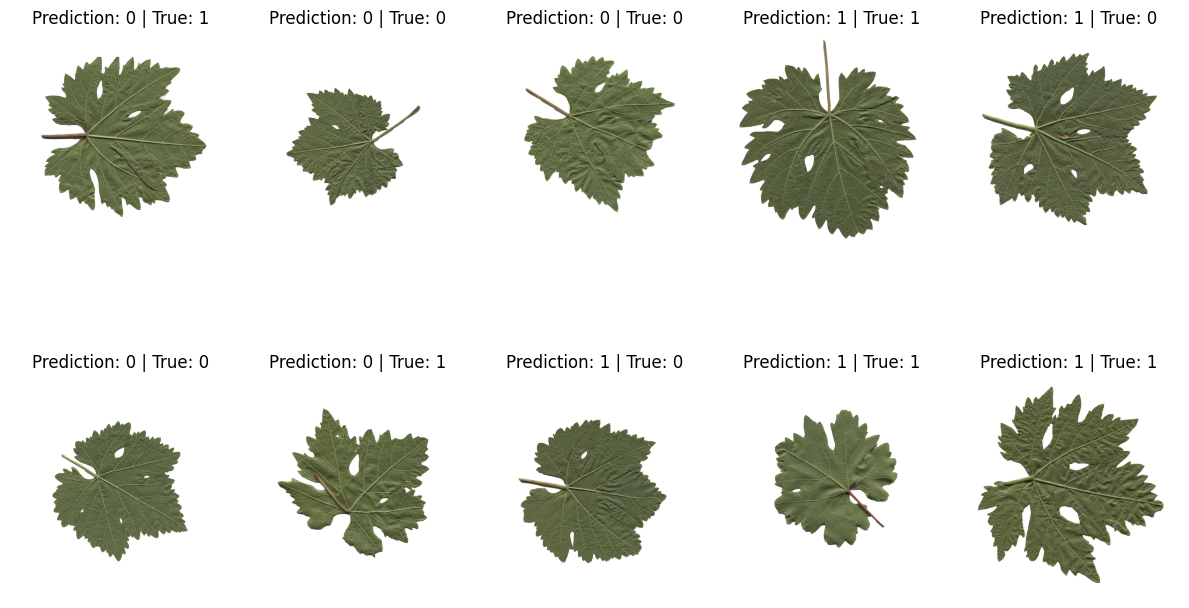

In [9]:
# Visualize some correctly and incorrectly classified images
plt.figure(figsize=(12, 8))
for i in range(10):
    image = test_images[i]
    prediction = test_predictions[i]
    true_label = test_labels[i]

    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.title('Prediction: {} | True: {}'.format(prediction, true_label))
    plt.axis('off')

plt.tight_layout()
plt.show()

In [10]:
# validation_dir = "./Grapevine_Leaves_Image_Dataset/validation/"

# # Image data preprocessing
# images = []
# labels = []

# # Iterate over the Dimnit images and add them to the arrays
# for filename in os.listdir(dimnit_dir):
#     image = Image.open(os.path.join(dimnit_dir, filename))
#     image = image.resize((128, 128))  # Resize the image to 128x128
#     image = np.array(image) / 255.0  # Normalize pixel values to range [0, 1]
#     images.append(image)
#     labels.append(0)  # Label Dimnit as 0
# images = []
# labels = []

# # Iterate over the Dimnit images and add them to the arrays
# for filename in os.listdir(validation_dir_dimnit):
#     image = Image.open(os.path.join(train_dir_dimnit, filename))
#     images.append(np.array(image))
#     labels.append(0)  # Label Dimnit as 0
    
# # Iterate over the Nazli images and add them to the arrays
# for filename in os.listdir(validation_dir_nazli):
#     image = Image.open(os.path.join(train_dir_nazli, filename))
#     images.append(np.array(image))
#     labels.append(1)  # Label Nazli as 1
    

    
    
    
# Load validation images
validation_images_dimnit = []
for filename in os.listdir(dimnit_dir):
    image = Image.open(os.path.join(validation_dir_dimnit, filename))
    image = image.resize((128, 128))
    image = np.array(image) / 255.0
    validation_images_dimnit.append(image)

validation_images_nazli = []
for filename in os.listdir(nazli_dir):
    image = Image.open(os.path.join(validation_dir_nazli, filename))
    image = image.resize((128, 128))
    image = np.array(image) / 255.0
    validation_images_nazli.append(image)

validation_images = validation_images_dimnit + validation_images_nazli

# Convert validation images and labels to NumPy arrays
validation_labels_dimnit = [0] * len(validation_images_dimnit)
validation_labels_nazli = [1] * len(validation_images_nazli)
validation_labels = validation_labels_dimnit + validation_labels_nazli

validation_images = np.array(validation_images)
validation_labels = np.array(validation_labels)

# Make predictions on the validation images
validation_predictions = model.predict(validation_images.reshape(len(validation_images), -1))

# Calculate validation accuracy
validation_accuracy = np.mean(validation_predictions == validation_labels)
print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')


FileNotFoundError: [Errno 2] No such file or directory: './Grapevine_Leaves_Image_Dataset/validation/dimnit/Dimnit (56).png'

# to delete the old downloaded dataset
!pwd
!rm -rf ./Grapevine_Leaves_Image_Dataset
!ls Grapevine_Leaves_Image_Dataset